# Image Compression:

- Extract the image and cluster based on allowed number of colours
- Return the colours and pixel with count
- Return shape of original image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img,load_img,save_img

In [2]:
original_img=load_img('./Testfile.jpg')

In [3]:
X_img=tf.constant(img_to_array(original_img),dtype=tf.int32)

In [4]:
original_shape=X_img.shape
original_shape

TensorShape([667, 1000, 3])

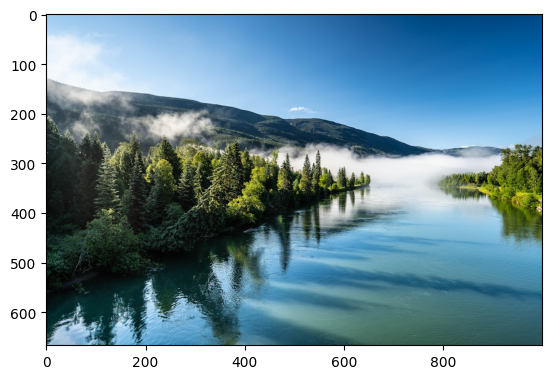

In [5]:
plt.imshow(X_img)

In [6]:
X_img=tf.reshape(X_img,[-1,3])
X_img.shape

TensorShape([667000, 3])

# Finding closest centroids:

In [7]:
def closest_centroids(X,centroids):
  [m,n]=X.shape
  k=centroids.shape[0]
  dist=[]
  for j in range(k):
    dist.append(tf.math.reduce_sum(tf.math.pow(tf.math.subtract(X,centroids[j]),2),axis=1))
  dist_i=tf.constant(np.array(dist))
  idx=tf.argmin(dist_i,axis=0)
  return tf.constant(idx)

# Computing Centroids:

In [8]:
def compute_centroids(X,idx,K):
  [m,n]=X.shape
  centroids=[]
  for j in range(K):
    X_j=X[idx==j]
    centroids.append(tf.math.reduce_sum(X_j,axis=0)/len(X_j))
  return tf.constant(np.array(centroids),dtype=tf.int32)

# Running K-Means:

In [9]:
def run_Kmeans(X,initial_centroids,max_iter=10):
  [m,n]=X.shape
  K=initial_centroids.shape[0]
  centroids=initial_centroids
  previous_centroids=initial_centroids
  for i in range(max_iter):
    print(f"Iteration:{i}/{max_iter-1}")
    idx=closest_centroids(X,centroids)
    centroids=compute_centroids(X,idx,K)
  return centroids,idx

# Randomized initial centroids:

In [10]:
def get_initial_centroids(X,K):
  randidx=tf.random.shuffle(X)
  centroids=randidx[:K]
  return centroids

# Distortion/Cost function:

In [11]:
def distortion_cost_sqr(X,centroids,idx):
  [m,n]=X.shape
  K=len(centroids)
  J=0
  for j in range(K):
    J_j=tf.math.reduce_sum(tf.math.pow(tf.math.subtract(X[idx==j],centroids[j]),2))
    J+=J_j
  return J/m

# Training Loop:

In [15]:
K=1000
max_iter=10
no_samples=10

centroids_list=[]
idx_list=[]

for i in range(no_samples):
  print(f"Training model {i}...")
  initial_centroids=get_initial_centroids(X_img,K)
  centroids_i,idx_i=run_Kmeans(X_img,initial_centroids,max_iter)
  centroids_list.append(centroids_i)
  idx_list.append(idx_i)
  print()

Training model 0...
Iteration:0/9


c:\Users\Sagar\anaconda3\envs\py39\lib\site-packages\tensorflow\python\framework\constant_op.py:102: RuntimeWarning: invalid value encountered in cast
  return ops.EagerTensor(value, ctx.device_name, dtype)


Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 1...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 2...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 3...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 4...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 5...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iteration:3/9
Iteration:4/9
Iteration:5/9
Iteration:6/9
Iteration:7/9
Iteration:8/9
Iteration:9/9

Training model 6...
Iteration:0/9
Iteration:1/9
Iteration:2/9
Iterat

Choice:7 J_cost:15.880736131934032


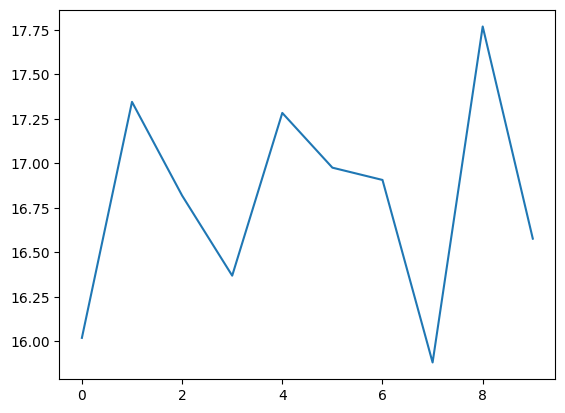

In [16]:
J_cost=[]

for i in range(no_samples):
  J_cost_i=distortion_cost_sqr(X_img,centroids_list[i],idx_list[i])
  J_cost.append(J_cost_i)

J_cost=np.array(J_cost)
choice=np.argmin(J_cost)
centroids,idx=centroids_list[choice],idx_list[choice]

plt.plot(range(no_samples),J_cost)

print(f"Choice:{choice} J_cost:{J_cost[choice]}")

In [17]:
centroids=np.array(centroids)
X_recovered=centroids[idx,:]
X_recovered=np.reshape(X_recovered,original_shape).astype(int)
X_recovered.shape

(667, 1000, 3)

Text(0.5, 1.0, 'Compressed')

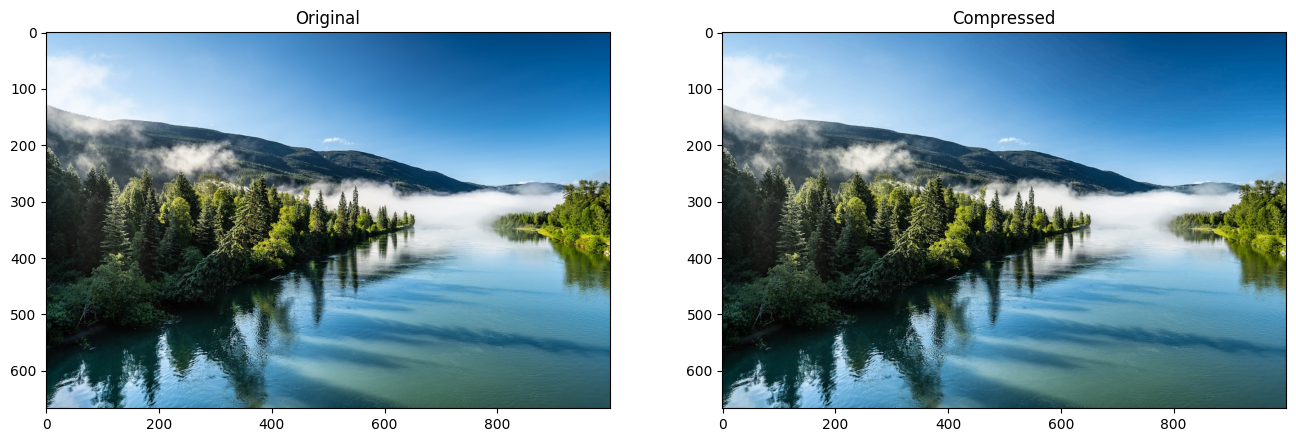

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,16))

ax[0].imshow(tf.reshape(X_img,original_shape))
ax[0].set_title('Original')

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed')

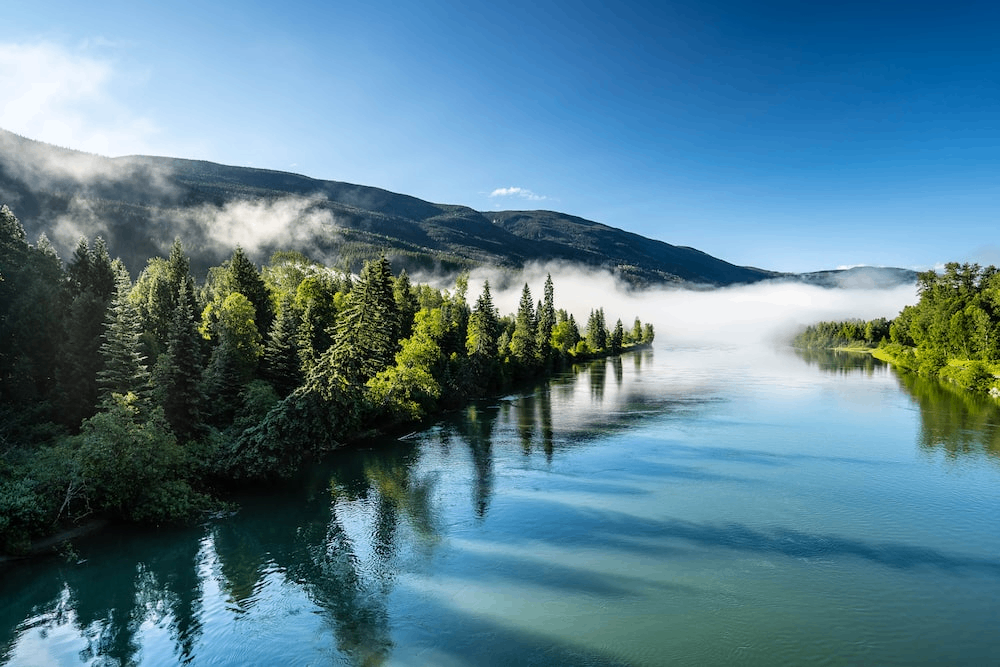

In [19]:
compressed_img=array_to_img(X_recovered)
compressed_img

In [20]:
save_img(path='./TestFile_comp_x.jpg',x=compressed_img)